In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Currently data is in directories like

In [47]:
# Try a new CNN with the input data augmented so it will classify obscured spheres
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

#########################################################
# With this the whole file structure had to be changed.
# TODO Use code for test train split, currently the last 10 or so files are used as test, not randomly
#   For test/train split
#       get list of positives and negatives, test/train split the list.
#       move all filenames in that list to either test, or train directory
#########################################################

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,  #
        height_shift_range=0.2, # Incresead these so theyre high so theyll know to classify sphere if only half a sphere is showing
        shear_range=0.2,
        zoom_range=[1,5],
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('TrainingImages/positives/positivePatch_304.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (51, 51, 3)
x = x.reshape((1,) + x.shape)  # np array with shape (1, 51, 51, 3)

# Save example images if you want to see whats happening inside
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='TrainingImages', save_prefix='augmented', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(51, 51, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [49]:
batch_size = 16 # TODO find out what batch_size is

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=[1,5],       # Changed to zoom out
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'TrainingImages/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'TrainingImages/train',  # this is the target directory
        target_size=(51, 51),  # all images will be resized to 51x51
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'TrainingImages/test',
        target_size=(51, 51),
        batch_size=batch_size,
        class_mode='binary')

Found 2830 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [50]:
# TODO search more about these hyperparameters
# steps_per_epoch???? 

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
#model.save_weights('augmentedCNN.h5')  # Maybe save if I find out how to load


Epoch 1/5
125/125 [==============================] - 23s 183ms/step - loss: 0.1268 - accuracy: 0.9635 - val_loss: 0.8855 - val_accuracy: 0.9242
Epoch 2/5
125/125 [==============================] - 16s 124ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.8118 - val_accuracy: 0.9394
Epoch 3/5
125/125 [==============================] - 11s 85ms/step - loss: 0.0163 - accuracy: 0.9985 - val_loss: 0.4580 - val_accuracy: 0.9469
Epoch 4/5
125/125 [==============================] - 11s 88ms/step - loss: 0.0145 - accuracy: 0.9990 - val_loss: 1.7072e-05 - val_accuracy: 0.9899
Epoch 5/5
125/125 [==============================] - 11s 90ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 2.5907e-06 - val_accuracy: 0.9899


# Classifier is trained
Now the classifier has been sufficiently trained we can use it on the pacman data

1 - First I will define the functions I created for the task

2 - Then I will use the PacMan code to play the game 

Prediction percentage: 0.9932115077972412 

Middle pixel Depth: 7.0760620921886614
Middle 4:
[[6.97405559 6.96423341]
 [7.05627259 7.07606209]]
Middle 8:
[[6.84416129 6.84416129 6.85050433 6.85812646]
 [6.97087355 6.97405559 6.96423341 6.96423341]
 [7.05627259 7.05627259 7.07606209 7.06017985]
 [7.15895332 7.15147822 7.15147822 7.15147822]]


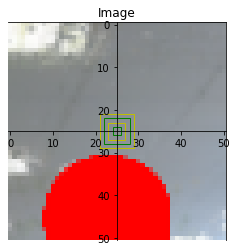

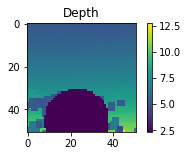

########################################

Prediction percentage: 0.9828113317489624 

Middle pixel Depth: 5.300640655574724
Middle 4:
[[6.60047218 6.60047218]
 [5.30064066 5.30064066]]
Middle 8:
[[9.3400073  9.32073334 9.32073334 9.32073334]
 [6.60047218 6.60047218 6.60047218 6.64162589]
 [5.30064066 5.30064066 5.30064066 6.61348509]
 [5.30064066 5.30064066 5.30064066 6.61348509]]


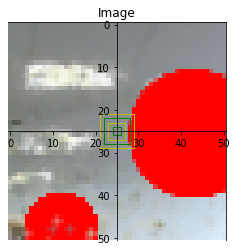

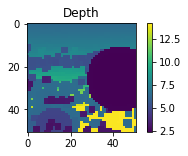

########################################

Prediction percentage: 1.0 

Middle pixel Depth: 2.370849792661627
Middle 4:
[[2.37021692 2.37084979]
 [2.37021692 2.37084979]]
Middle 8:
[[2.37012702 2.37025099 2.37087191 2.37228006]
 [2.37011924 2.37021692 2.37084979 2.37212033]
 [2.37011924 2.37021692 2.37084979 2.37212033]
 [2.37011924 2.37021692 2.37084979 2.37212033]]


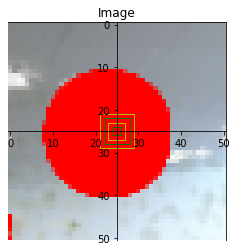

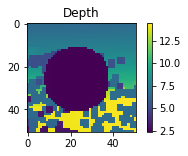

########################################

Prediction percentage: 1.0 

Middle pixel Depth: 4.787336569775664
Middle 4:
[[4.80878909 4.79097699]
 [4.80409548 4.78733657]]
Middle 8:
[[4.9797448  4.81797938 4.79839061 4.7859649 ]
 [4.84235002 4.80878909 4.79097699 4.77925918]
 [4.83312494 4.80409548 4.78733657 4.77654406]
 [4.83035802 4.80302449 4.78664487 4.77604612]]


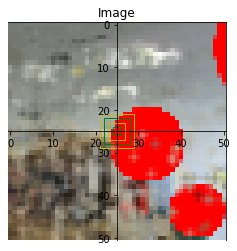

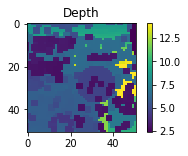

########################################

Prediction percentage: 0.9999982118606567 

Middle pixel Depth: 3.0553134404749964
Middle 4:
[[7.1401971  7.14135466]
 [3.05531344 3.05531344]]
Middle 8:
[[7.14017036 7.14017036 7.14122205 7.14725915]
 [7.1401971  7.1401971  7.14135466 7.14764101]
 [7.14322662 3.05531344 3.05531344 3.05531344]
 [3.06534498 3.05531344 3.05531344 3.05531344]]


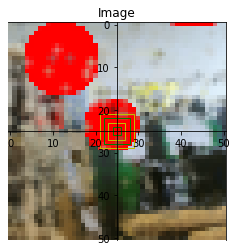

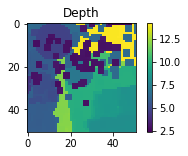

########################################



In [272]:

############### OLD BUT KEPT FOR REFERENCE #####################
# Define function sliding window
# returns array of windows that I can classify at once
def sliding_window( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []

    for y in range(0, image_hight-window_size, step_size):   # Verticle
        for x in range (0, image_width-window_size, step_size):   #horizontal
            windows.append(image[y:y+window_size, x:x+window_size, :])
    print('Number of windows: {}'.format(len(windows)))

    return np.array(windows) # Return windows as np array

# This function is an extention of the sliding_window function
# The function takes in
# Prints 
# Returns the x,y coordinates of all the possible spheres ?????  
def sliding_window_classifier( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []    # Dont do anything with windows ?
    result = []

    for y in range(0, image_hight-window_size, step_size): 
        for x in range (0, image_width-window_size, step_size):

            window = image[y:y+window_size, x:x+window_size, :]

            #Normaly you predict on an array of value, but here we want the (x,y) coordinates and this is easier
            window = np.expand_dims(window, axis=0) # Adds first dimension to data (1,51,51,3) -> (1,51,51,3) # MIGHT get not np error
            prediction = model.predict( np.array( window ) )
            prediction = prediction[0][0] #  Unpack prediction [[1.]] -> 1

            if (prediction > 0.3):
                # SECTION FOR DEBUGGING PURPOSES
                #print('Coordinates: X:{}, Y:{}'.format(x,y))
                print('Prediction percentage: {} \n'.format(prediction))   #
                print('Middle pixel Depth: {}'.format(depth[y+26, x+26]))   # TODO call depth as a parameter or ensure it is correct
                # Find depth look at the middle

                # 26 IS MIDDLE PIXEL
                #TODO Draw a rectangle over these                 
                print('Middle 4:')
                print(depth[ y+25:y+27, x+25:x+27 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                        # GET MIN/MODE OF THIS
                print('Middle 8:')
                print(depth[ y+24:y+28, x+24:x+28 ])    # IS THIS IN THE MIDDLE OR OF TO THE SIDE
                                                        # GET MIN/MODE OF THIS
                plt.figure(figsize=(8,4))
                plt.title('Image')
                plt.imshow( window[0,:,:,:] )   
                from matplotlib.patches import Rectangle
                ax=plt.gca()    # gca=get_current_axes?
 

                # Middle 4      1x1 either side
                ax.add_patch(Rectangle((24,24), width=2, height=2,linewidth=1,edgecolor='g',facecolor='none'))  
                # Middle 16     2x2 either side
                ax.add_patch(Rectangle((23,23), width=4, height=4,linewidth=1,edgecolor='y',facecolor='none')) 
                # Middle 36     3x3 either side
                ax.add_patch(Rectangle((22,22), width=6, height=6,linewidth=1,edgecolor='g',facecolor='none'))
                # Middle 64     4x4 either side
                ax.add_patch(Rectangle((21,21), width=8, height=8,linewidth=1,edgecolor='y',facecolor='none'))  

                ax.spines['left'].set_position('center')
                ax.spines['bottom'].set_position('center')
                #ax.xaxis.set_ticks([])
                #ax.yaxis.set_ticks([])  # Remove ticks
                ax.xaxis.set_ticks_position('bottom')
                ax.yaxis.set_ticks_position('left')
                plt.show()

                plt.figure(figsize=(4,2))
                plt.title('Depth')
                plt.imshow( depth[y:y+51, x:x+51] )    
                plt.colorbar()
                plt.show()
                print('########################################')
                print()
                # SECTION FOR DEBUGGING PURPOSES

                result.append( (x, y, prediction) )
                #return (x,y)    # WILL ONLY PRINT FIRST ONE TODO PRINT VECTOR OF x,y s

    # Results are np array with columns: X, Y, Prediction
    return np.concatenate(result).reshape(-1,3)    # If len(coordinates)==0 then no spheres were found

# sliding_window_classifier( 20, image) # Example of how to call

# Not for task but function to nicely visualise allmaps
def visualise_maps(image, mapx, mapy, mapz, depth):
    # Inputs can be full 160x240 or 51x51 in size
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,3))

    ax[0].set_title('image')
    im0 = ax[0].imshow(image)
    #fig.colorbar(im, ax=ax[0])

    ax[1].set_title('mapx')
    im1 = ax[1].imshow(mapx, cmap='bwr')
    fig.colorbar(im1, ax=ax[1])

    ax[2].set_title('mapy')
    im2 = ax[2].imshow(mapy, cmap='bwr')
    fig.colorbar(im2, ax=ax[2])

    ax[3].set_title('mapz')
    im3 = ax[3].imshow(mapz, cmap='bwr')
    fig.colorbar(im3, ax=ax[3])

    ax[4].set_title('depth')
    im4 = ax[4].imshow(depth, cmap='bwr')
    fig.colorbar(im4, ax=ax[4])

# DELETE AFTER THIS AND PUT AT THE END TO KEEP TIDY
x = sliding_window_classifier(20, image)

In [273]:
print(x)
x.sort(axis=1)
print(x[x[:,-1].argsort()] )
x

[[80.         20.          0.99321151]
 [60.         40.          0.98281133]
 [80.         40.          1.        ]
 [40.         60.          1.        ]
 [60.         80.          0.99999821]]
[[ 0.98281133 40.         60.        ]
 [ 1.         40.         60.        ]
 [ 0.99321151 20.         80.        ]
 [ 1.         40.         80.        ]
 [ 0.99999821 60.         80.        ]]


array([[ 0.99321151, 20.        , 80.        ],
       [ 0.98281133, 40.        , 60.        ],
       [ 1.        , 40.        , 80.        ],
       [ 1.        , 40.        , 60.        ],
       [ 0.99999821, 60.        , 80.        ]])

In [113]:
# Get first image to classify
import PacMan_functionality as PacMan

# Initilise game
global_cloud, spheres_collected = PacMan.startup_scene()
position = np.asarray([0, 0, 0])
angle = np.asarray([0, 0, 0])
# Obtain image and associated maps
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)

X:80, Y:40
[[0.7826497]]
Middle pixel Depth: 6.931433648184327


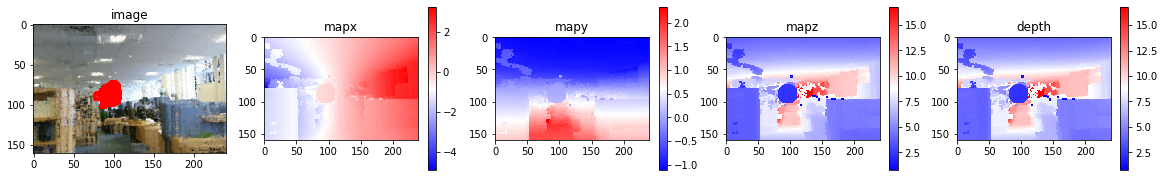

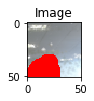

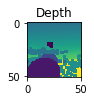

X:60, Y:60
[[1.]]
Middle pixel Depth: 2.3450562704232105


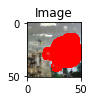

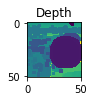

X:80, Y:60
[[0.9999186]]
Middle pixel Depth: 9.526254051029587


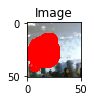

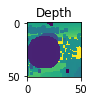

[(80, 40), (60, 60), (80, 60)]

In [172]:
# See what world looks like before we move
visualise_maps(image, mapx, mapy, mapz, depth)
# Look for spheres
sliding_window_classifier(20, image)

In [174]:
# Our classifier trained on augmented data works well, but will it classify after i've moved?

position = np.asarray([0, 0, 0])
print('I am at position [{0}, {1}, {2}]'.format(*position))
print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

# Move position and update scene
position = np.asarray([-0.18, 0.08, 2.31])
print('I am now at position [{0}, {1}, {2}]'.format(*position))
global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected);
print('I have found {0} out of {1} spheres!\n'.format(np.sum(spheres_collected), len(spheres_collected)));

I am at position [0, 0, 0]
I have found 0 out of 11 spheres!

I am now at position [-0.18, 0.08, 2.31]
I have found 1 out of 11 spheres!



X:80, Y:20
[[0.9932115]]
Middle pixel Depth: 6.974055591030181
Middle 4:
[[6.84416129 6.84416129]
 [6.97087355 6.97405559]]


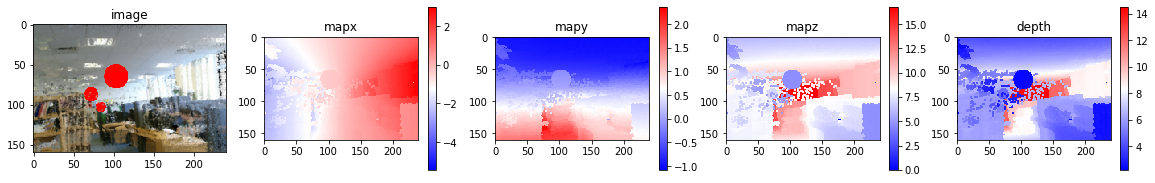

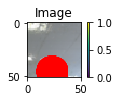

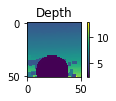

X:60, Y:40
[[0.98281133]]
Middle pixel Depth: 6.600472176127599
Middle 4:
[[9.3400073  9.32073334]
 [6.60047218 6.60047218]]


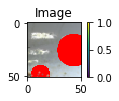

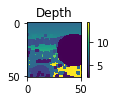

X:80, Y:40
[[1.]]
Middle pixel Depth: 2.3702169154910755
Middle 4:
[[2.37012702 2.37025099]
 [2.37011924 2.37021692]]


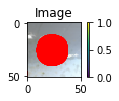

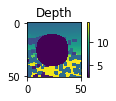

X:40, Y:60
[[1.]]
Middle pixel Depth: 4.808789089080604
Middle 4:
[[4.9797448  4.81797938]
 [4.84235002 4.80878909]]


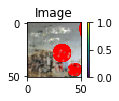

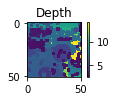

X:60, Y:80
[[0.9999982]]
Middle pixel Depth: 7.140197095296019
Middle 4:
[[7.14017036 7.14017036]
 [7.1401971  7.1401971 ]]


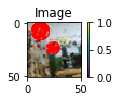

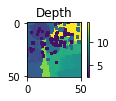

[(80, 20), (60, 40), (80, 40), (40, 60), (60, 80)]

In [187]:
# Get new images
image, mapx, mapy, mapz, depth = PacMan.project_pointcloud_image(global_cloud, angle, position)
# See what world looks like before we move
visualise_maps(image, mapx, mapy, mapz, depth)
# Look for spheres
sliding_window_classifier(20, image)

Coordinates: X:80, Y:20
Prediction percentage: 0.9932115077972412 %
Middle pixel Depth: 7.0760620921886614
Middle 4:
[[6.97405559 6.96423341]
 [7.05627259 7.07606209]]
Middle 8:
[[6.84416129 6.84416129 6.85050433 6.85812646]
 [6.97087355 6.97405559 6.96423341 6.96423341]
 [7.05627259 7.05627259 7.07606209 7.06017985]
 [7.15895332 7.15147822 7.15147822 7.15147822]]


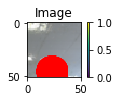

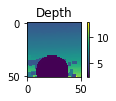

########################################

Coordinates: X:60, Y:40
Prediction percentage: 0.9828113317489624 %
Middle pixel Depth: 5.300640655574724
Middle 4:
[[6.60047218 6.60047218]
 [5.30064066 5.30064066]]
Middle 8:
[[9.3400073  9.32073334 9.32073334 9.32073334]
 [6.60047218 6.60047218 6.60047218 6.64162589]
 [5.30064066 5.30064066 5.30064066 6.61348509]
 [5.30064066 5.30064066 5.30064066 6.61348509]]


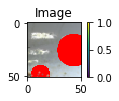

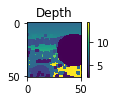

########################################

Coordinates: X:80, Y:40
Prediction percentage: 1.0 %
Middle pixel Depth: 2.370849792661627
Middle 4:
[[2.37021692 2.37084979]
 [2.37021692 2.37084979]]
Middle 8:
[[2.37012702 2.37025099 2.37087191 2.37228006]
 [2.37011924 2.37021692 2.37084979 2.37212033]
 [2.37011924 2.37021692 2.37084979 2.37212033]
 [2.37011924 2.37021692 2.37084979 2.37212033]]


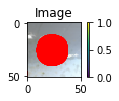

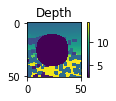

########################################

Coordinates: X:40, Y:60
Prediction percentage: 1.0 %
Middle pixel Depth: 4.787336569775664
Middle 4:
[[4.80878909 4.79097699]
 [4.80409548 4.78733657]]
Middle 8:
[[4.9797448  4.81797938 4.79839061 4.7859649 ]
 [4.84235002 4.80878909 4.79097699 4.77925918]
 [4.83312494 4.80409548 4.78733657 4.77654406]
 [4.83035802 4.80302449 4.78664487 4.77604612]]


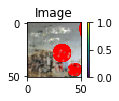

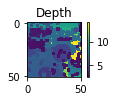

########################################

Coordinates: X:60, Y:80
Prediction percentage: 0.9999982118606567 %
Middle pixel Depth: 3.0553134404749964
Middle 4:
[[7.1401971  7.14135466]
 [3.05531344 3.05531344]]
Middle 8:
[[7.14017036 7.14017036 7.14122205 7.14725915]
 [7.1401971  7.1401971  7.14135466 7.14764101]
 [7.14322662 3.05531344 3.05531344 3.05531344]
 [3.06534498 3.05531344 3.05531344 3.05531344]]


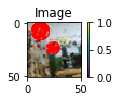

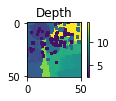

########################################



[(80, 20), (60, 40), (80, 40), (40, 60), (60, 80)]

In [196]:
sliding_window_classifier(20, image)

In [176]:
# Move to next sphere and update

In [177]:
#

In [178]:
#

In [179]:
#

In [180]:
#
#

In [181]:
#

In [182]:
#